#Q1
Polynomial functions and kernel functions are related in the context of machine learning, particularly in support vector machines (SVMs) and kernelized algorithms. In machine learning, kernel functions are used to transform input data into a higher-dimensional space, making it possible to find a linear decision boundary in that space, even if the original data is not linearly separable. Polynomial functions are a specific type of kernel function.

The relationship can be understood by considering the polynomial kernel, which is a type of kernel function commonly used in SVMs. The polynomial kernel of degree d is defined as:

K(x,y)=(x⋅y+c)^d

Here, x and y are input data points, 

c is a constant, and d is the degree of the polynomial. 

The polynomial kernel essentially computes the dot product of the input vectors raised to the power of d.

Accuracy: 0.73


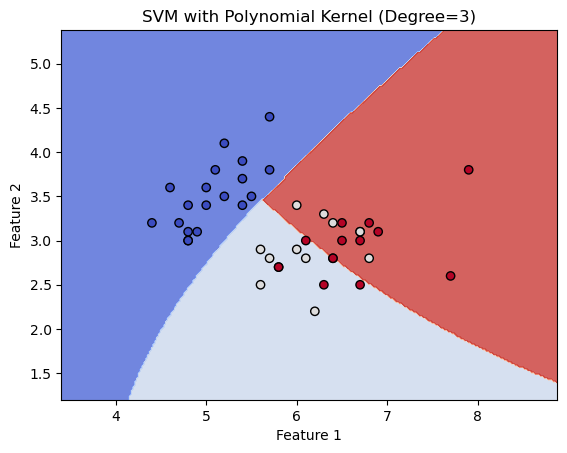

In [2]:
#1
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel of degree 3
svm_classifier = SVC(kernel='poly', degree=3, C=1.0, random_state=42)

# Training the classifier
svm_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary and data points
plot_decision_boundary(X_test, y_test, svm_classifier, 'SVM with Polynomial Kernel (Degree=3)')

In [3]:
#Q2
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel of degree 3
svm_classifier = SVC(kernel='poly', degree=3, C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


#Q3

In Support Vector Regression (SVR), the parameter epsilon (ϵ) determines the width of the epsilon-tube around the predicted value within which no penalty is associated with errors. This tube represents a margin of tolerance within which errors are ignored. The epsilon parameter influences the number of support vectors because it determines how much deviation from the predicted value is acceptable.

When you increase the value of epsilon:

Wider Tolerance for Errors: A larger epsilon allows for a wider margin of tolerance, meaning that the SVR model is more lenient in terms of accepting deviations from the predicted values.

Fewer Support Vectors: With a wider tolerance, fewer data points need to be considered as support vectors. Support vectors are the data points that lie on the margin or within the epsilon-tube. As epsilon increases, more data points are considered within an acceptable range, and fewer become support vectors.

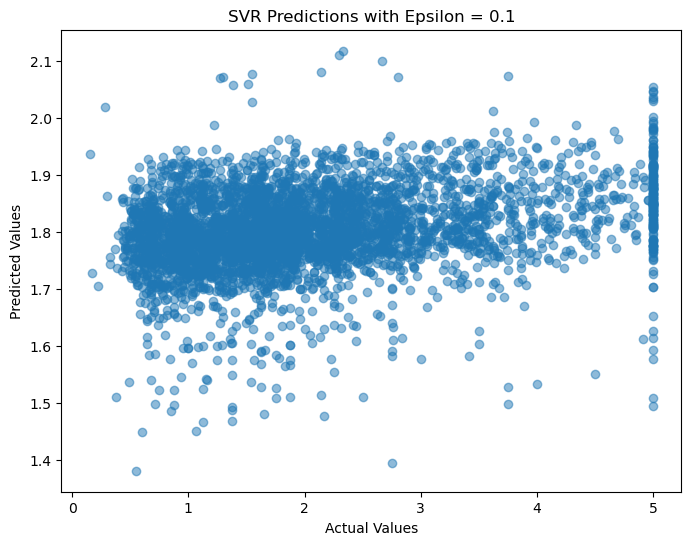

Mean Squared Error with Epsilon = 0.1: 1.3320


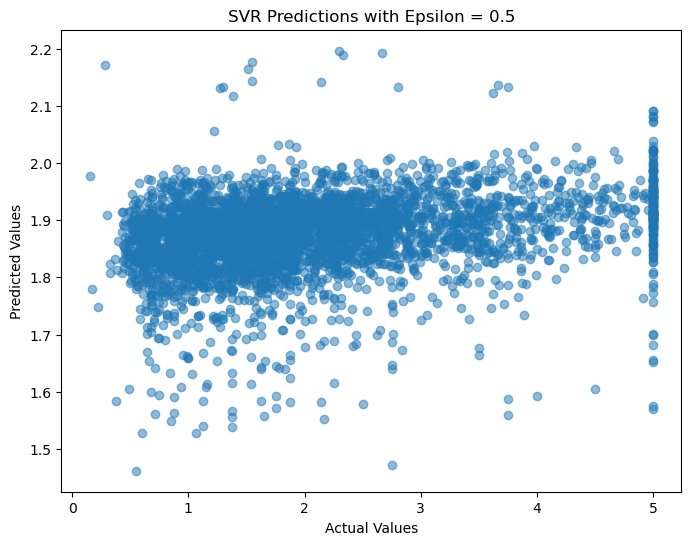

Mean Squared Error with Epsilon = 0.5: 1.3057


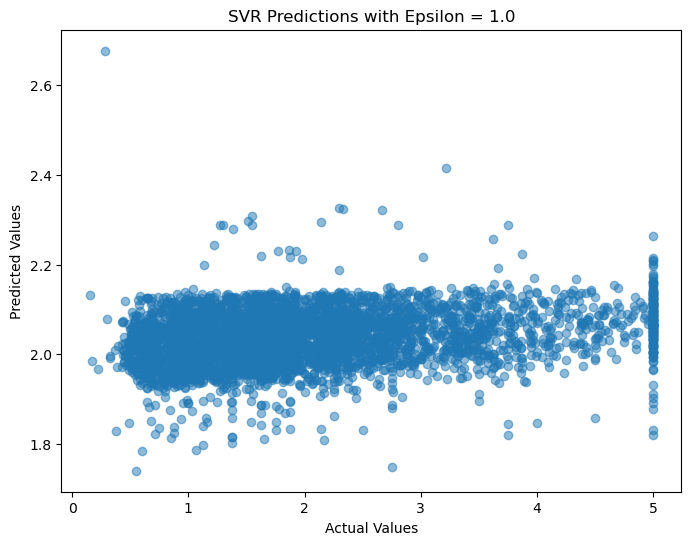

Mean Squared Error with Epsilon = 1.0: 1.2806


In [4]:
#3
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train SVR and plot predictions
def train_and_plot_svr(epsilon):
    # Create SVR model with a radial basis function (RBF) kernel
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=epsilon)

    # Train the model
    svr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr_model.predict(X_test)

    # Plot predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'SVR Predictions with Epsilon = {epsilon}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error with Epsilon = {epsilon}: {mse:.4f}')

# Train and plot SVR with different values of epsilon
epsilons = [0.1, 0.5, 1.0]
for epsilon in epsilons:
    train_and_plot_svr(epsilon)


#Q4
Support Vector Regression (SVR) is a powerful technique for regression tasks, and its performance is highly influenced by several key parameters. Let's discuss the main parameters in SVR and how they affect the model:

Kernel Function:

Purpose: The kernel function determines the type of transformation applied to the input features.
Common Types:
Linear Kernel (kernel='linear'): Suitable for linear relationships.
Radial Basis Function (RBF) Kernel (kernel='rbf'): Suitable for non-linear relationships.
Polynomial Kernel (kernel='poly'): Suitable for polynomial relationships.
Example:
Use a linear kernel when the relationship between input features and target is approximately linear.
Use an RBF kernel for non-linear relationships.

C Parameter:

Purpose: C is the regularization parameter that controls the trade-off between fitting the training data well and having a smooth decision function.
Effect of Increasing:
A smaller C encourages a smoother decision surface, potentially allowing some training points to be misclassified.
A larger C penalizes errors more heavily, potentially leading to a more complex decision boundary.
Example:
Increase C when you want to reduce the tolerance for errors in the training data.

Epsilon Parameter (ϵ):

Purpose: Epsilon determines the width of the epsilon-tube, which is the margin of tolerance for errors.
Effect of Increasing:
A larger epsilon allows for a wider margin of tolerance, making the model more robust to small errors.
Example:
Increase epsilon when you want the model to be less sensitive to small deviations from the predicted values.
Gamma Parameter:

Purpose: Gamma defines the influence of a single training example. It affects the shape of the decision boundary.
Effect of Increasing:
A smaller gamma results in a more generalized decision boundary.
A larger gamma makes the decision boundary more dependent on the training data, potentially leading to overfitting.
Example:
Increase gamma when you have a small dataset or when each training example is expected to have high relevance.

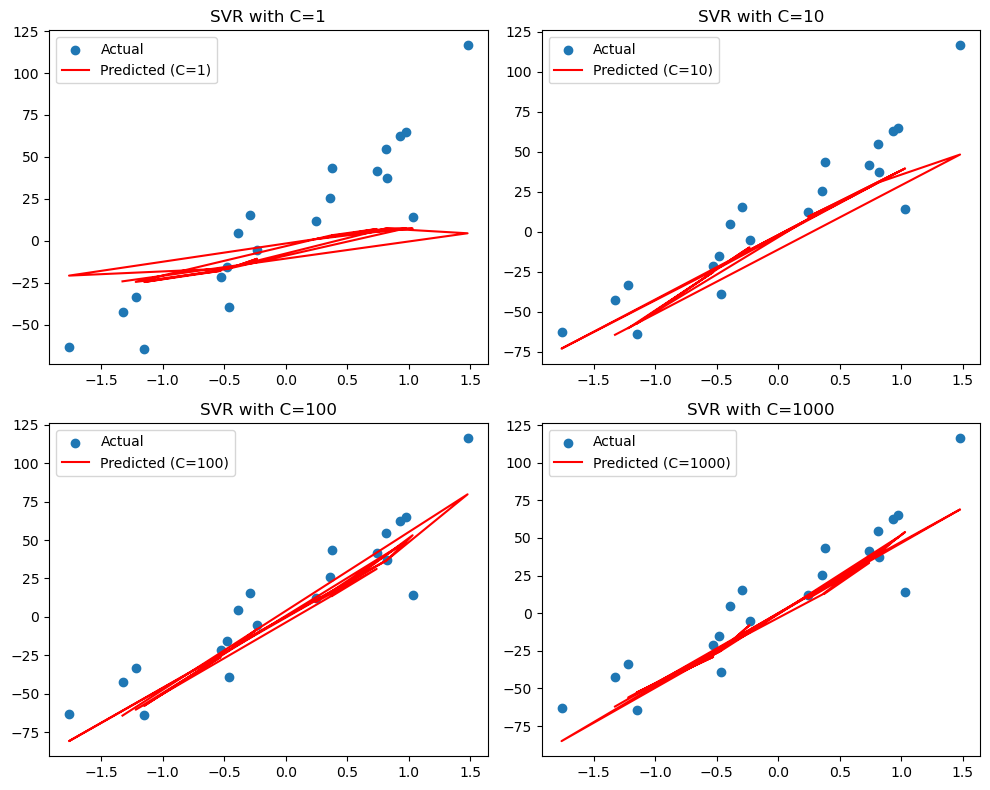

In [5]:
#4
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVR with different values of C and gamma
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, C_val in zip(axes.flatten(), [1, 10, 100, 1000]):
    svr_model = SVR(kernel='rbf', C=C_val, gamma='scale')
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    ax.scatter(X_test, y_test, label='Actual')
    ax.plot(X_test, y_pred, color='red', label=f'Predicted (C={C_val})')
    ax.set_title(f'SVR with C={C_val}')
    ax.legend()

plt.tight_layout()
plt.show()

In [7]:
#Q7

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Tune hyperparameters using GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the tuned classifier on the entire dataset
tuned_svc = SVC(**best_params)
tuned_svc.fit(X_train_scaled, y_train)

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc, 'tuned_svc_classifier.pkl')


Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



['tuned_svc_classifier.pkl']